# Домашняя работа

Задание:
Существуют 5 тензоров, соединенные как на рисунке. Необходимо осуществить свертку 3мя способами:
- Через цикл for
- Через функцкии reshape и произведение
- Через ncon.

Сравнить объемы кода и время выполнения.

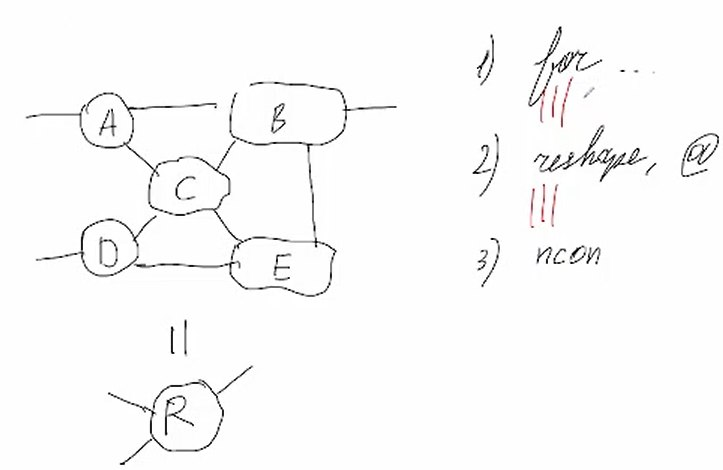

In [1]:
from ncon import ncon
import numpy as np
import time

In [2]:
# Init tensors
x = 10
a = np.random.rand(x,x,x)
b = np.random.rand(x,x,x,x)
c = np.random.rand(x,x,x,x)
d = np.random.rand(x,x,x)
e = np.random.rand(x,x,x)

In [3]:
def tensor_for(a,b,c,d,e,x):
    ac = np.zeros((x, x, x, x, x))
    for i in range(x):
        for j in range(x):
            for k in range(x):
                for l in range(x):
                    for m in range(x):
                        for n in range(x): 
                            ac[i, j, k, l, m] = ac[i, j, k, l, m] + a[i, j, n] * c[n, k, l, m]
    acb = np.zeros((x, x, x, x, x))
    for i in range(x):
        for j in range(x):
            for k in range(x):
                for l in range(x):
                    for m in range(x):
                        for n in range(x):
                            for p in range(x):  
                                acb[i, j, k, l, m] = acb[i, j, k, l, m] + ac[i, n, p, j, k] * b[n, p, m, l]
    acbe = np.zeros((x, x, x, x))
    for i in range(x):
        for j in range(x):
            for k in range(x):
                for l in range(x):
                    for m in range(x):
                        for n in range(x):
                            acbe[i, j, k, l] = acbe[i, j, k, l] + acb[i, j, m, k, n] * e[n, m, l]
    acbed  = np.zeros((x, x, x))
    for i in range(x):
        for j in range(x):
            for k in range(x):
                for l in range(x):
                    for m in range(x):
                        acbed[i, j, k] =  acbed[i, j, k] + acbe[i, l, j, m] + d[m, l, k]
    return acbed

In [4]:
def tensor_reshape(a,b,c,d,e):
    ac = np.tensordot(a,c, axes = ([2],[0]))
    acb = np.tensordot(ac,b, axes = ([1,2],[0,1]))
    acbe = np.tensordot(acb,e, axes = ([2,3],[1,0]))
    acbed = np.tensordot(acbe,d, axes = ([1,2],[1,2]))
    return acbed

In [5]:
def tensor_ncon(a,b,c,d,e):
    return ncon((a, b, c, d, e), ([-1, 1, 5], [1, 6, 2, -2], [5, 6, 4, 7], [3, 4, -3], [2, 7, 3]))

In [6]:
start = time.time()
print(tensor_for(a,b,c,d,e,x))
for_end = time.time() - start
print(f'Time of completion: {for_end}')

[[[676979.10929699 676971.3139863  676974.41262509 676974.51245479
   676977.79518493 676972.70998928 676976.20087011 676978.72007114
   676976.32837412 676973.1122392 ]
  [687551.02910823 687543.23379753 687546.33243633 687546.43226602
   687549.71499617 687544.62980051 687548.12068134 687550.63988237
   687548.24818535 687545.03205044]
  [681919.63355877 681911.83824808 681914.93688687 681915.03671656
   681918.31944671 681913.23425106 681916.72513188 681919.24433291
   681916.8526359  681913.63650098]
  [681015.06959749 681007.27428679 681010.37292559 681010.47275528
   681013.75548542 681008.67028977 681012.1611706  681014.68037163
   681012.28867461 681009.0725397 ]
  [688789.11395077 688781.31864007 688784.41727887 688784.51710856
   688787.7998387  688782.71464305 688786.20552388 688788.72472491
   688786.33302789 688783.11689298]
  [701341.05724622 701333.26193553 701336.36057432 701336.46040402
   701339.74313416 701334.65793851 701338.14881934 701340.66802037
   701338.276323

In [7]:
start = time.time()
print(tensor_reshape(a,b,c,d,e))
reshape_end = time.time() - start
print(f'Time of completion: {reshape_end}')

[[[397709.06872805 313183.25004801 363337.37828364 378005.61497596
   323858.19425036 368433.47271077 352126.71652444 347929.71163878
   374278.85300286 380408.72086876]
  [370921.20562834 292084.25374153 338887.36857697 352421.13792181
   301989.5615092  343424.84179992 328182.44080236 324559.04647528
   348905.88536128 354756.12304588]
  [377050.63536141 296936.89679064 344675.59214671 358480.06025718
   306751.85543104 349206.2137463  333413.80736263 329943.13591514
   354791.87973844 360557.70247586]
  [388509.22751974 305914.91400756 354926.00568731 369214.70763023
   316204.8551604  359847.37041049 343553.760574   339762.77583286
   365336.86828934 371394.31679168]
  [390258.56177428 307531.2833442  356654.29780693 370833.51123816
   317881.17862477 361324.60005534 345214.25943029 341367.58736412
   367069.16391871 373206.53516059]
  [376226.77695468 296277.52800771 344046.82488148 357795.77448286
   306259.27195336 348460.78042909 332905.69854512 329210.02676061
   354027.783543

In [8]:
start = time.time()
print(tensor_ncon(a,b,c,d,e))
ncon_end = time.time() - start

print(f'Time of completion: {ncon_end}')

[[[368763.57232775 313135.45397546 335406.43037203 337177.55354388
   358268.70816353 325128.53687106 348956.23047638 366823.10240042
   350816.30238436 326231.6289362 ]
  [374561.07150709 317914.49293906 340603.03872384 342361.47800294
   363898.65976724 330145.46973518 354411.25098802 372563.35030684
   356127.37582966 331285.89478196]
  [371449.3902447  315285.13073554 337824.60529015 339632.32250488
   360663.39340667 327118.76917403 351469.34910957 369594.49621491
   353253.60321796 328572.03424652]
  [370977.02434273 314849.49631272 337349.20700323 339074.08864045
   360443.24563916 326943.85689226 351016.36117576 369006.99652832
   352641.90378197 328134.55393329]
  [375117.95600764 318558.35472725 341332.81019186 342951.88815424
   364562.52058299 330673.44217062 354966.34531568 373062.90527898
   356669.91617554 331913.06368932]
  [382060.67987746 324475.11422299 347625.72576232 349327.78923824
   371162.06836081 336762.819568   361455.5772486  379946.43212069
   363438.497397

In [10]:
print(f'For time: {for_end} \nreshape_time: {reshape_end} \nncon time: {ncon_end}')

For time: 5.387804269790649 
reshape_time: 0.010250091552734375 
ncon time: 0.047186851501464844


По скорости выполнения самым быстрым оказывается reshape, а по количеству кода выигрывает ncon с одной строчкой.